In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import statsmodels.api as sm
import scipy.stats as st


In [19]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

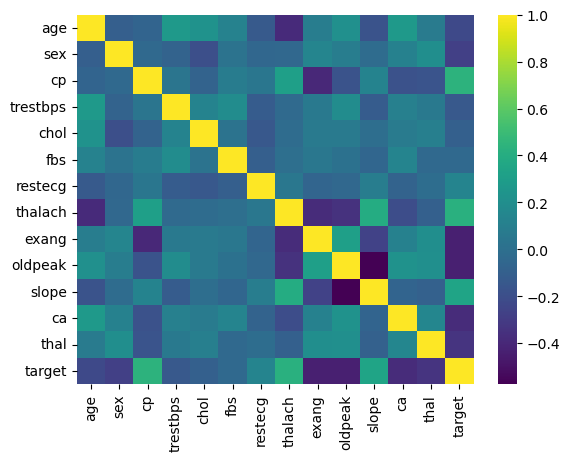

In [21]:
sns.heatmap(df.corr(), cmap='viridis')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='count'>

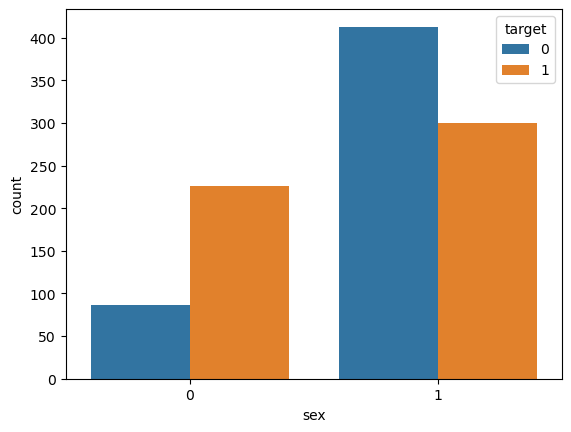

In [26]:
sns.countplot(data=df, x='sex', hue='target')

<AxesSubplot:xlabel='cp', ylabel='count'>

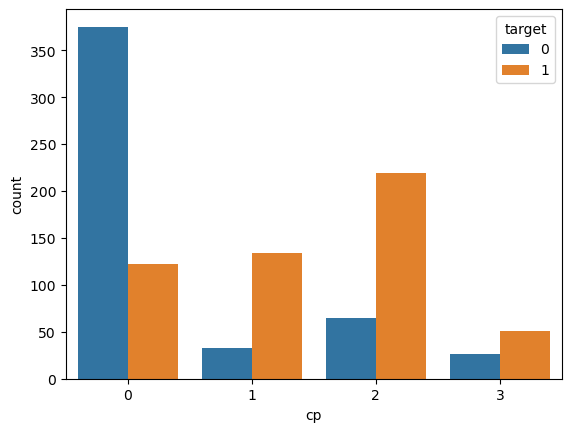

In [27]:
sns.countplot(data=df, x='cp', hue='target')

<AxesSubplot:xlabel='exang', ylabel='count'>

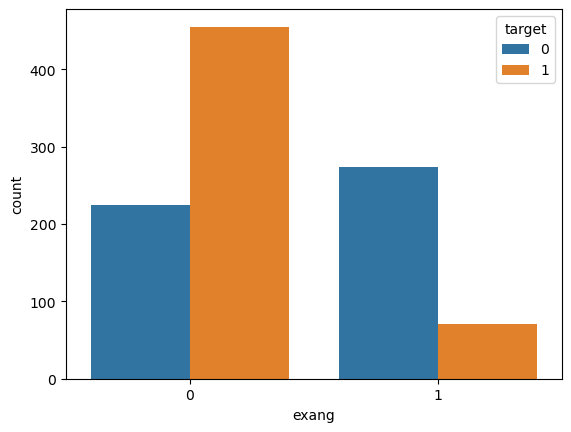

In [28]:
sns.countplot(data=df, x='exang', hue='target')

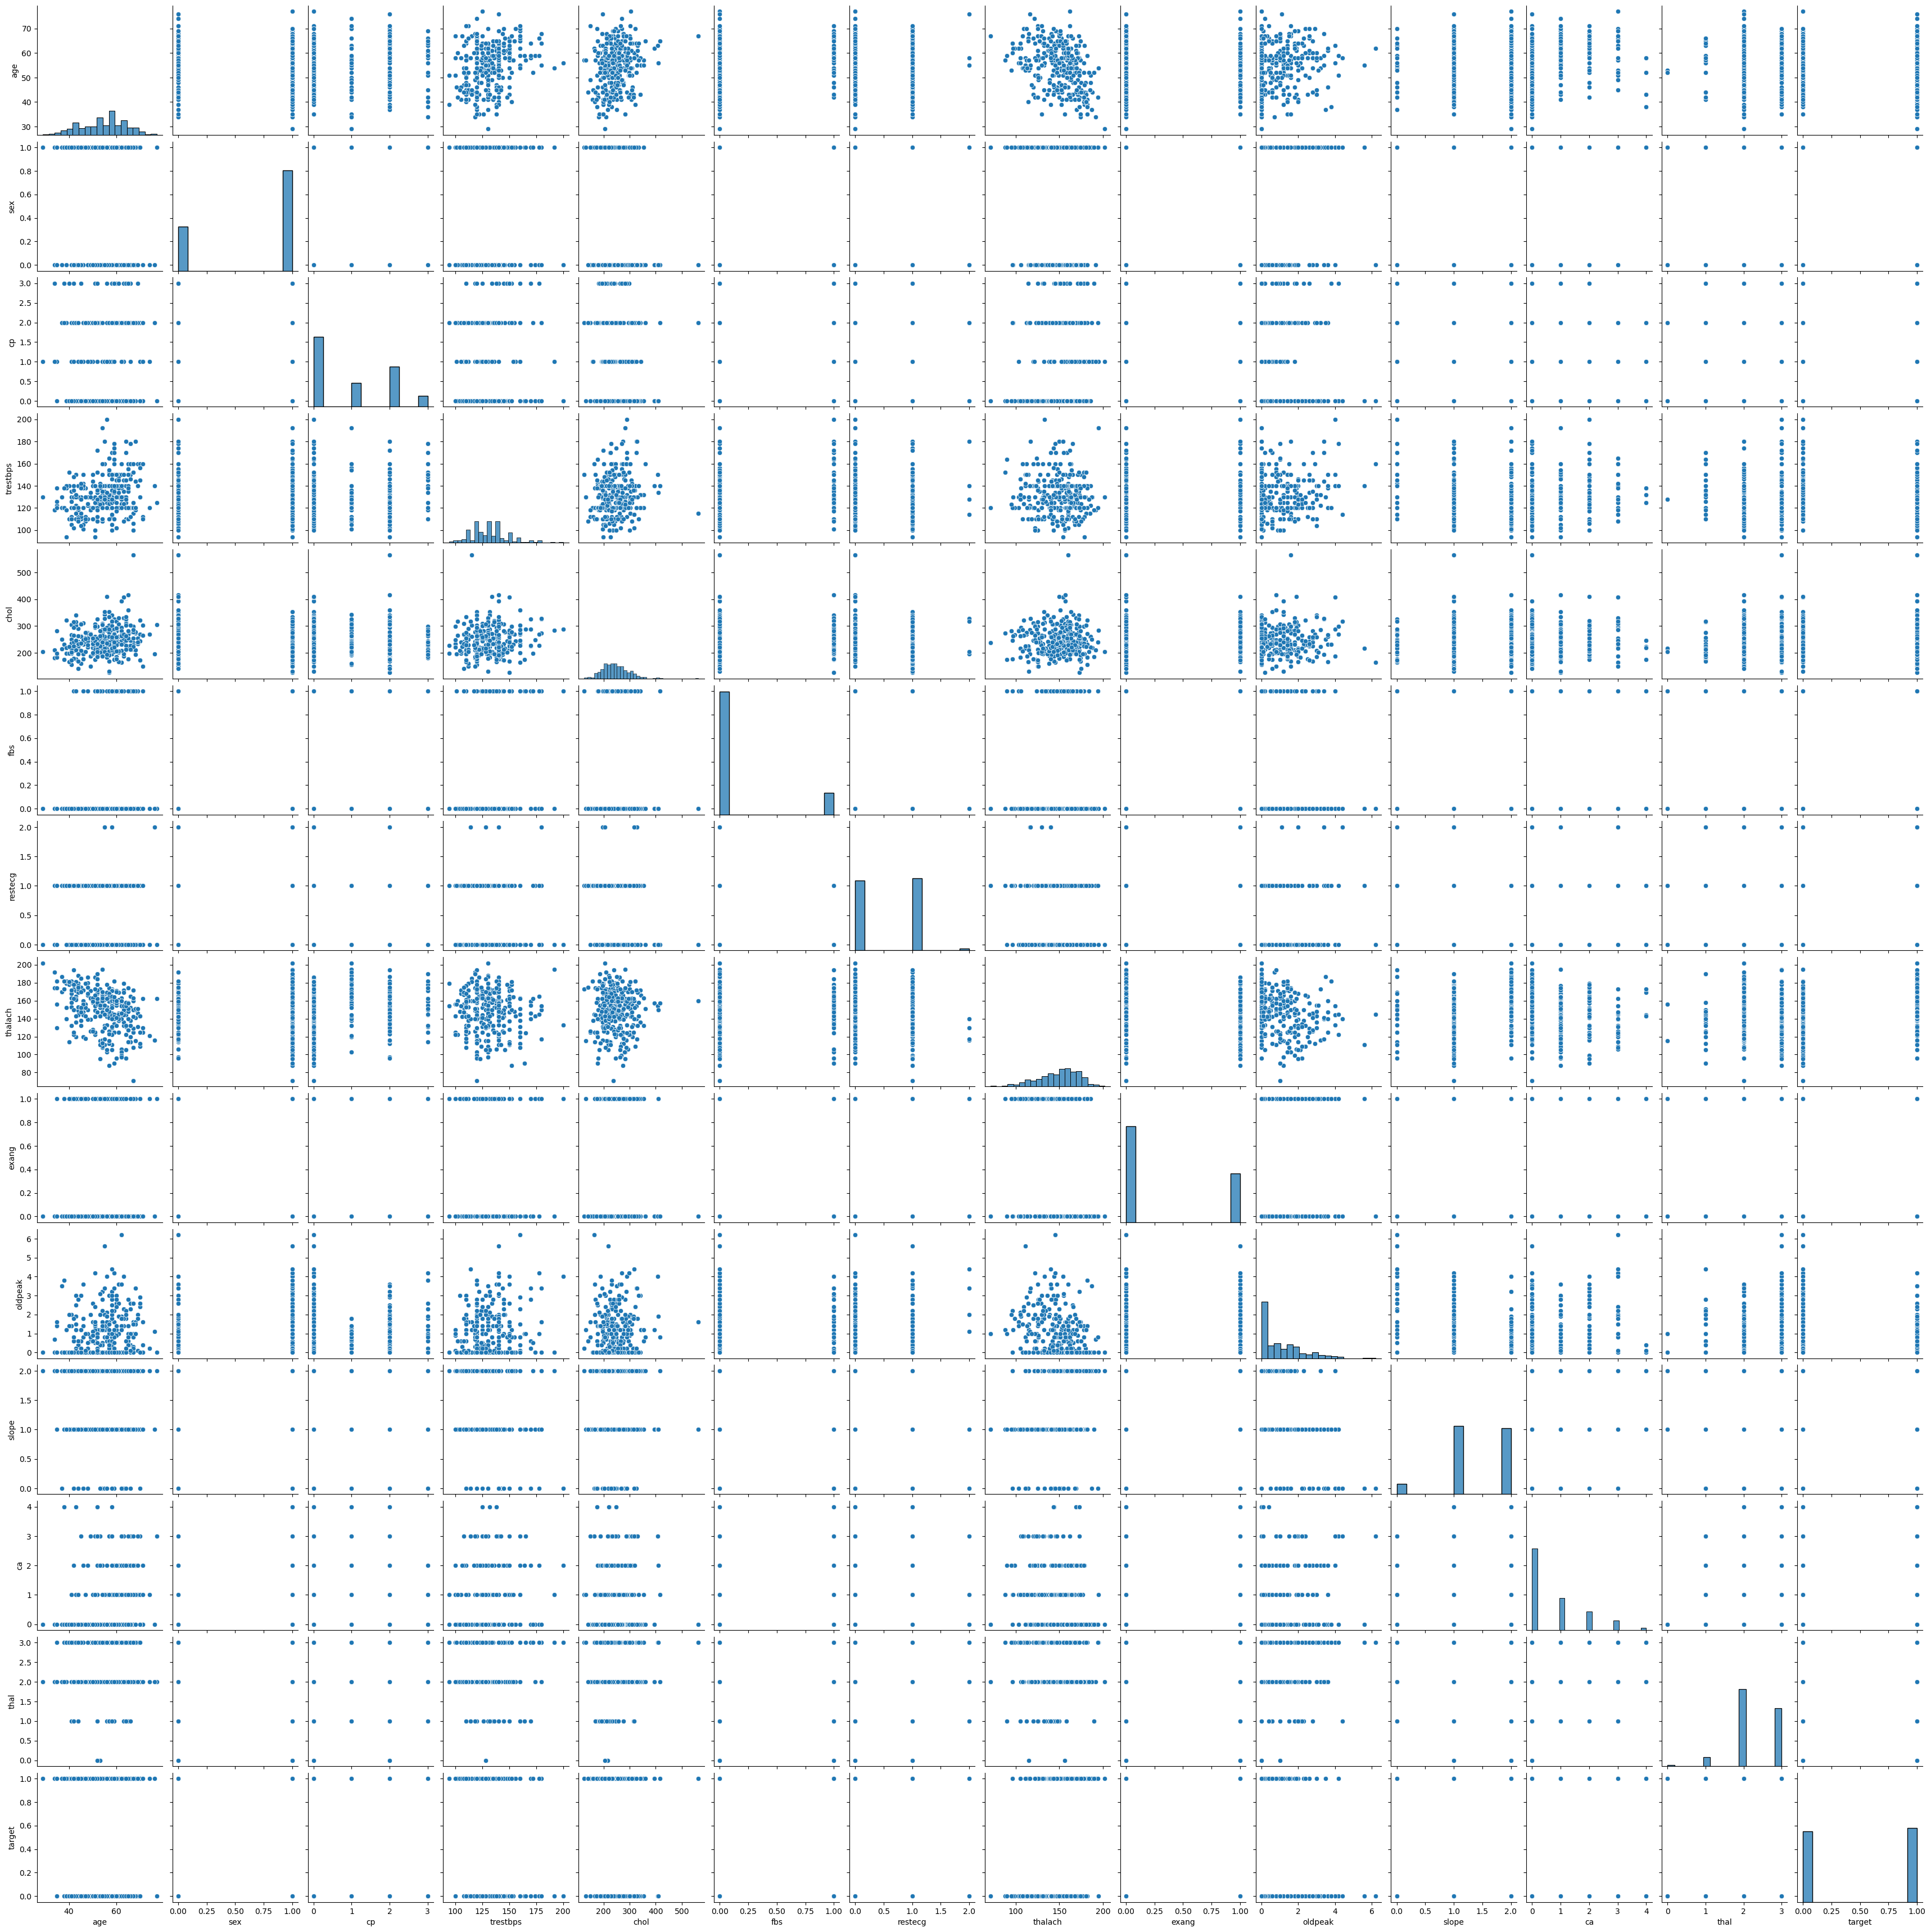

In [29]:
sns.pairplot(data=df)

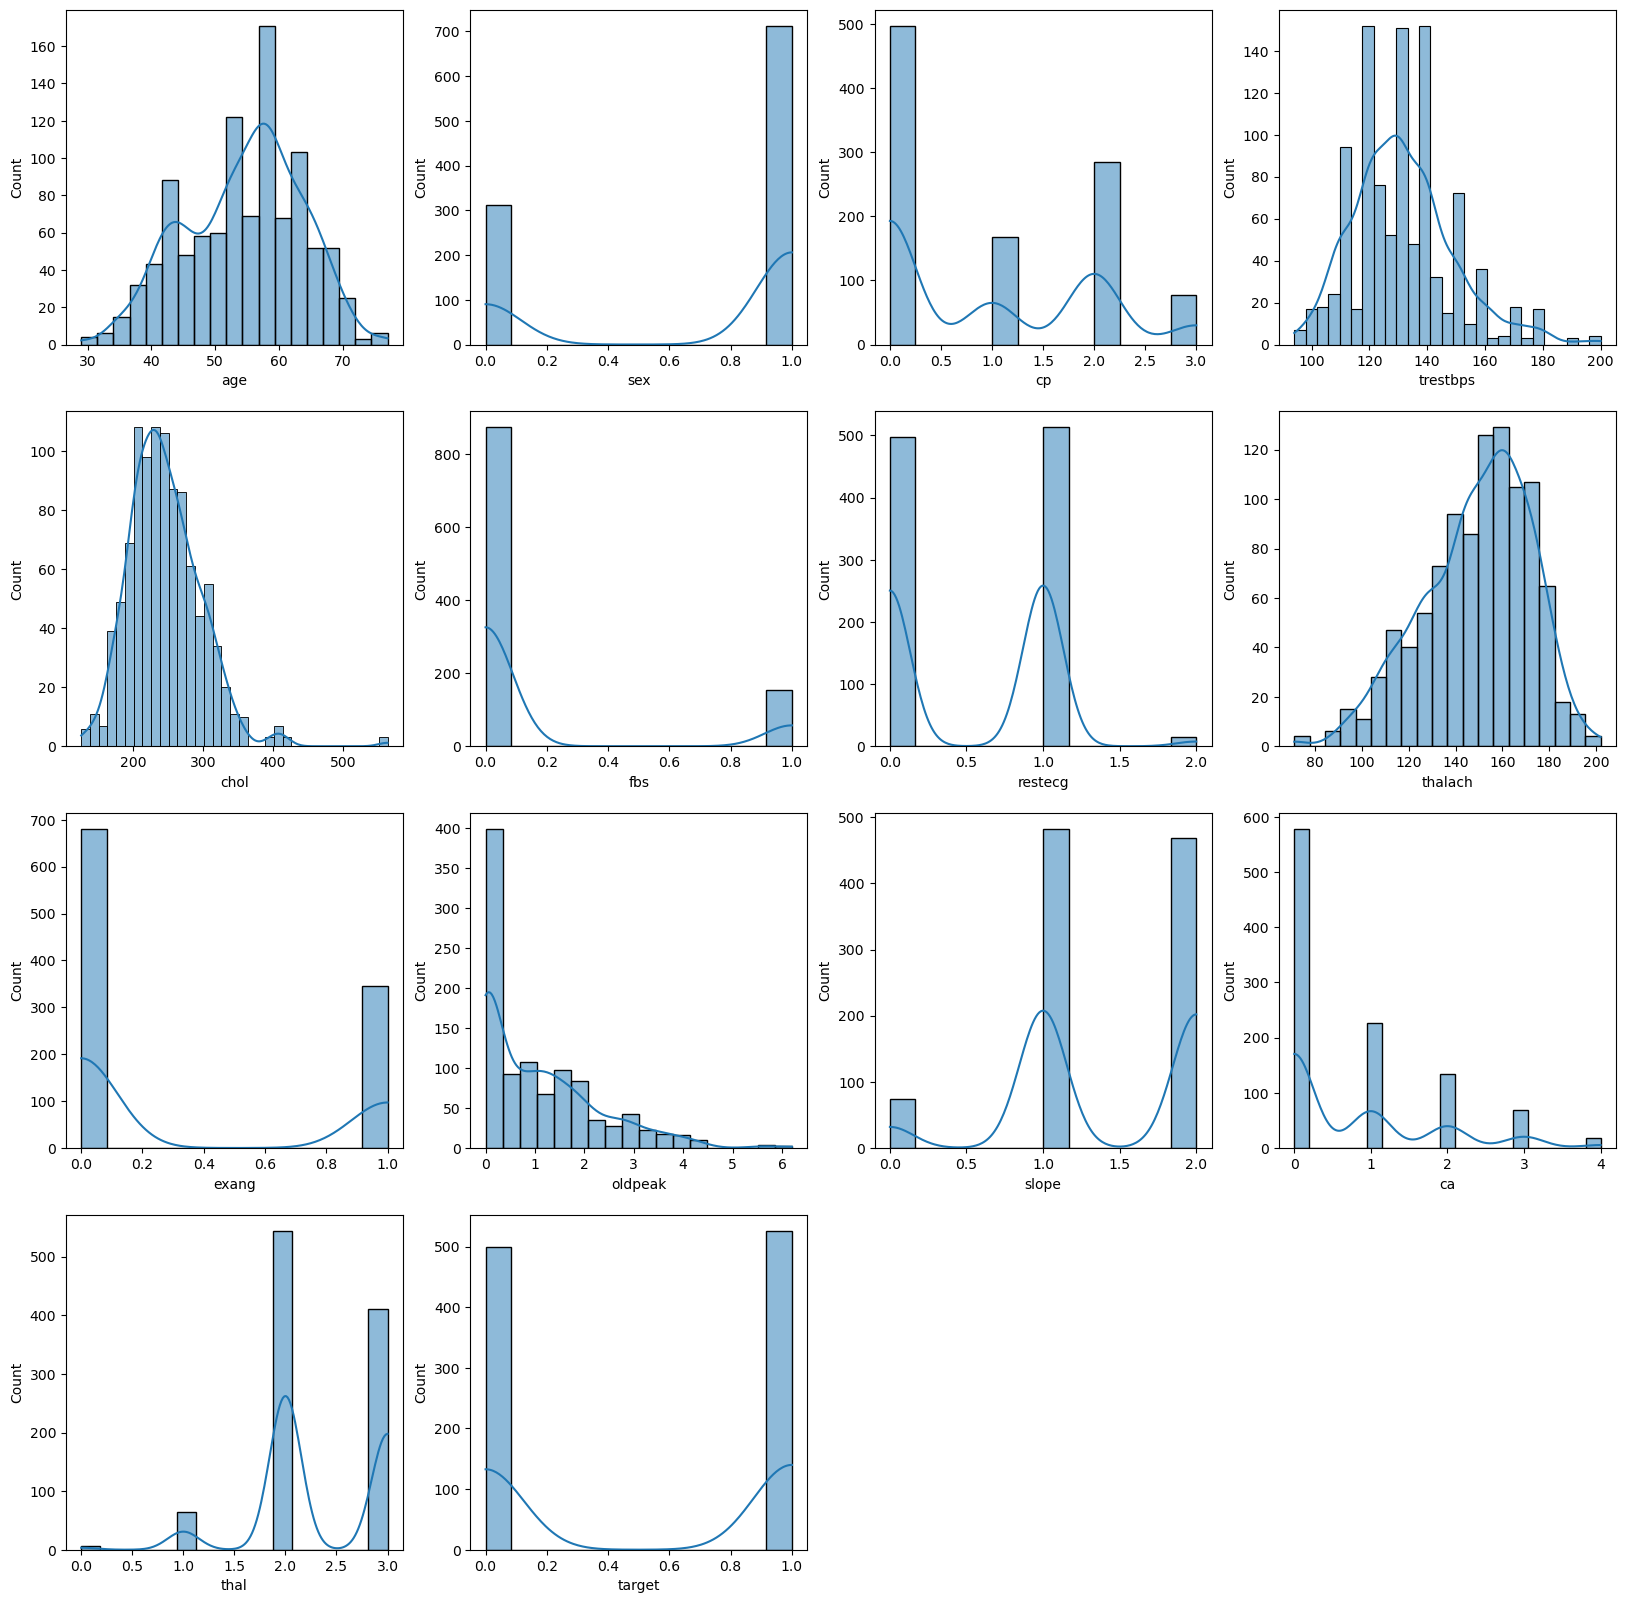

In [30]:
plt.figure(figsize = (20, 20))
columns = list(df)
subplt = 1
for col in columns:
    if subplt <= len(columns):
        ax = plt.subplot(4, 4, subplt)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col)
    subplt += 1
plt.show()

In [32]:
X = df.drop('target', axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
predictions = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

[[171   0]
 [  3 165]]


In [38]:
log = LogisticRegression(max_iter=7)
log.fit(X_train, y_train)

/home/sohom/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=7)

In [39]:
print(classification_report(y_test, log.predict(X_test)))
print(confusion_matrix(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       171
           1       0.69      0.68      0.69       168

    accuracy                           0.69       339
   macro avg       0.69      0.69      0.69       339
weighted avg       0.69      0.69      0.69       339

[[119  52]
 [ 53 115]]


In [42]:
ranfor = RandomForestClassifier(n_estimators=450)
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=450)

In [43]:
print(classification_report(y_test, ranfor.predict(X_test)))
print(confusion_matrix(y_test, ranfor.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

[[171   0]
 [  3 165]]


In [44]:
from sklearn.metrics import accuracy_score
kneighbors = accuracy_score(y_test, predictions)
logres = accuracy_score(y_test, log.predict(X_test))
forest = accuracy_score(y_test, ranfor.predict(X_test))

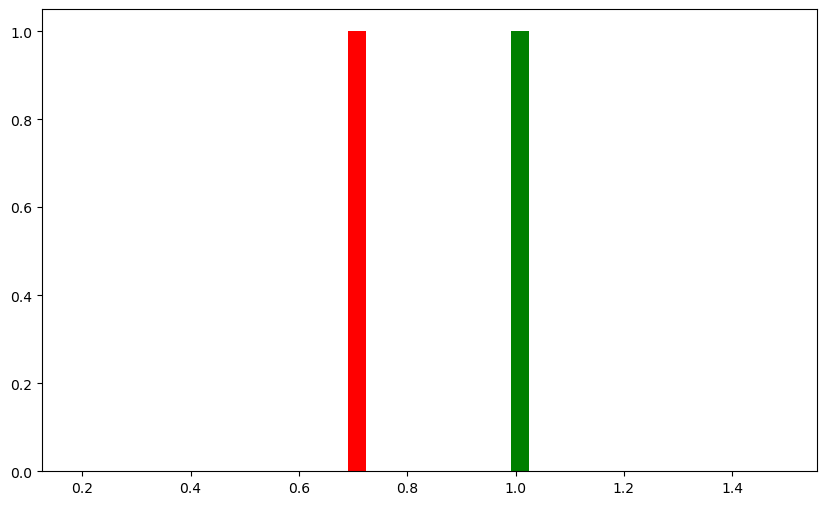

In [47]:
plt.figure(figsize=(10,6))
plt.hist(kneighbors, bins=30, color='blue')
plt.hist(logres, bins=30, color='red')
plt.hist(forest, bins=30, color='green')

plt.show()